In [8]:
# Load the dataset
import pandas as pd
sales_data = pd.read_csv('/content/Superstore.csv',encoding='latin1')

# Display the first few rows and summary statistics
print(sales_data.head())
print(sales_data.info())
print(sales_data.describe())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [9]:
# Handle missing values

# Checking for missing values
print("Missing values in each column:")
print(sales_data.isnull().sum())

Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
# Create any new columns needed for analysis

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d-%m-%Y')
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], format='%d-%m-%Y')
sales_data['Order Year'] = sales_data['Order Date'].dt.year
sales_data['Order Month'] = sales_data['Order Date'].dt.month
sales_data['Ship Year'] = sales_data['Ship Date'].dt.year
sales_data['Ship Month'] = sales_data['Ship Date'].dt.month



In [12]:
print(sales_data.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Sub-Category                                       Product Name     Sales  \
0    Bookcases           

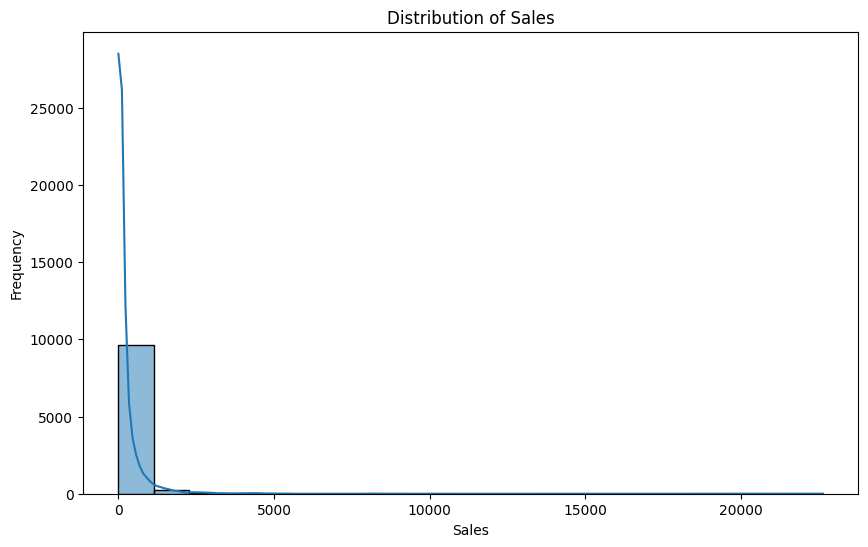

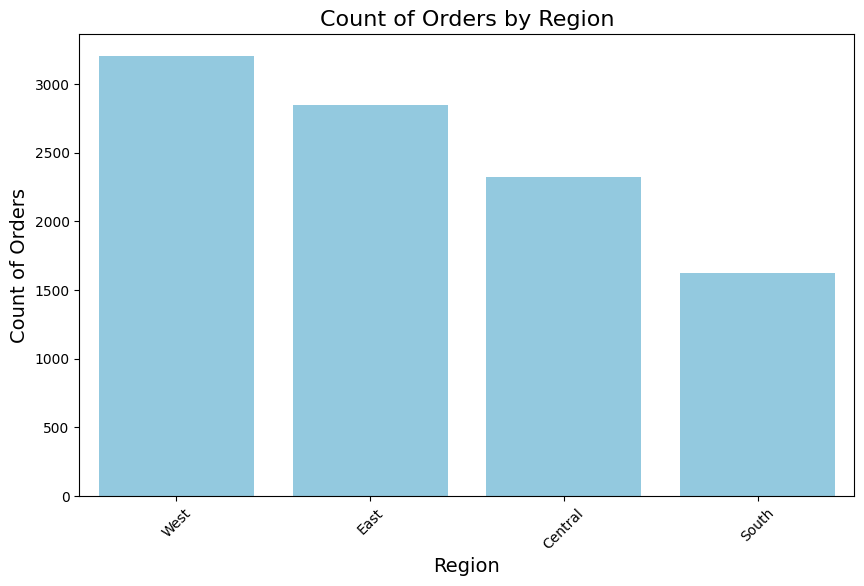

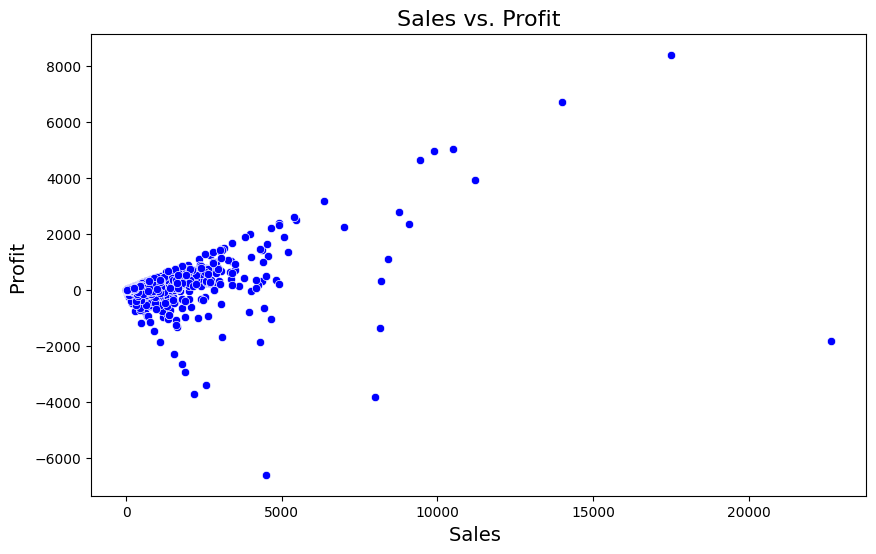

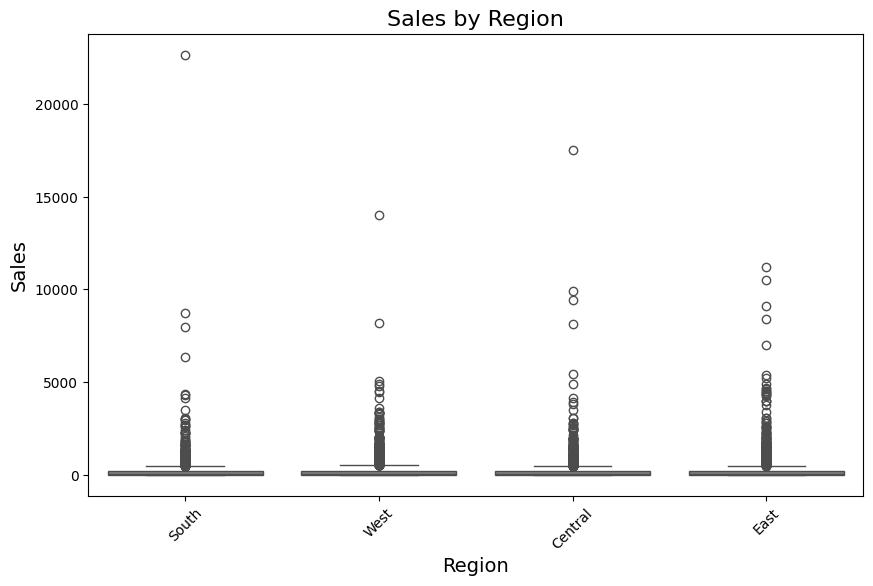

In [35]:
# Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns like 'Sales' and 'Profit'
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Sales'], bins=20, kde=True )
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Count of orders by region
region_order_count = sales_data['Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_order_count.index, y=region_order_count.values, color="skyblue")
plt.title('Count of Orders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='Sales', y='Profit', color='blue')
plt.title('Sales vs. Profit', fontsize=16)
plt.xlabel('Sales ', fontsize=14)
plt.ylabel('Profit ', fontsize=14)
plt.show()

#Sales by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=sales_data, color='grey')
plt.title("Sales by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [39]:
# Summary statistics for numerical variables
numerical_stats = sales_data.describe()
print("Summary statistics for numerical variables:\n")
print(numerical_stats)

# Summary statistics for categorical variables (e.g., Customer Segment, Region, etc.)
categorical_stats = sales_data.select_dtypes(include=['object']).describe()
print("\nSummary statistics for categorical variables:\n")
print(categorical_stats)

# Additional Summary for Sales and Profit (since these are key variables)
sales_profit_summary = sales_data[['Sales', 'Profit']].describe()
print("\nSummary statistics for Sales and Profit:\n")
print(sales_profit_summary)

# Grouping by 'Category' and calculating summary statistics for 'Sales' and 'Profit'
grouped_stats_category = sales_data.groupby('Category')[['Sales', 'Profit']].agg(['mean', 'sum', 'count', 'min', 'max'])

# Display the grouped statistics for category
print("Grouped statistics by Category:\n")
print(grouped_stats_category)



Summary statistics for numerical variables:

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2013-04-30 19:20:02.401441024   
min       1.000000            2011-01-04 00:00:00   
25%    2499.250000            2012-05-23 00:00:00   
50%    4997.500000            2013-06-27 00:00:00   
75%    7495.750000            2014-05-15 00:00:00   
max    9994.000000            2014-12-31 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2013-05-04 18:20:49.229537792  55190.379428    229.858001     3.789574   
min              2011-01-08 00:00:00   1040.000000      0.444000     1.000000   
25%              2012-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2013-06-30 00:00:00  56430.500000     54.490000     3.0

In [47]:

import scipy.stats as stats


# Perform the T-test for sales in different regions

region_sales = sales_data.groupby('Region')['Sales'].mean()


region_east = sales_data[sales_data['Region'] == 'East']['Sales']
region_west = sales_data[sales_data['Region'] == 'West']['Sales']

t_stat, p_value = stats.ttest_ind(region_east, region_west)


print(f"T-test: T-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

contingency_table = pd.crosstab(sales_data['Ship Mode'], sales_data['Segment'])
chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(contingency_table)


print(f"Chi-square test: chi2 = {chi2_stat:.4f}, p-value = {chi2_p_value:.4f}" , f"dof = {dof}")



T-test: T-statistic = 0.8039, p-value = 0.4215
Chi-square test: chi2 = 28.0979, p-value = 0.0001 dof = 6


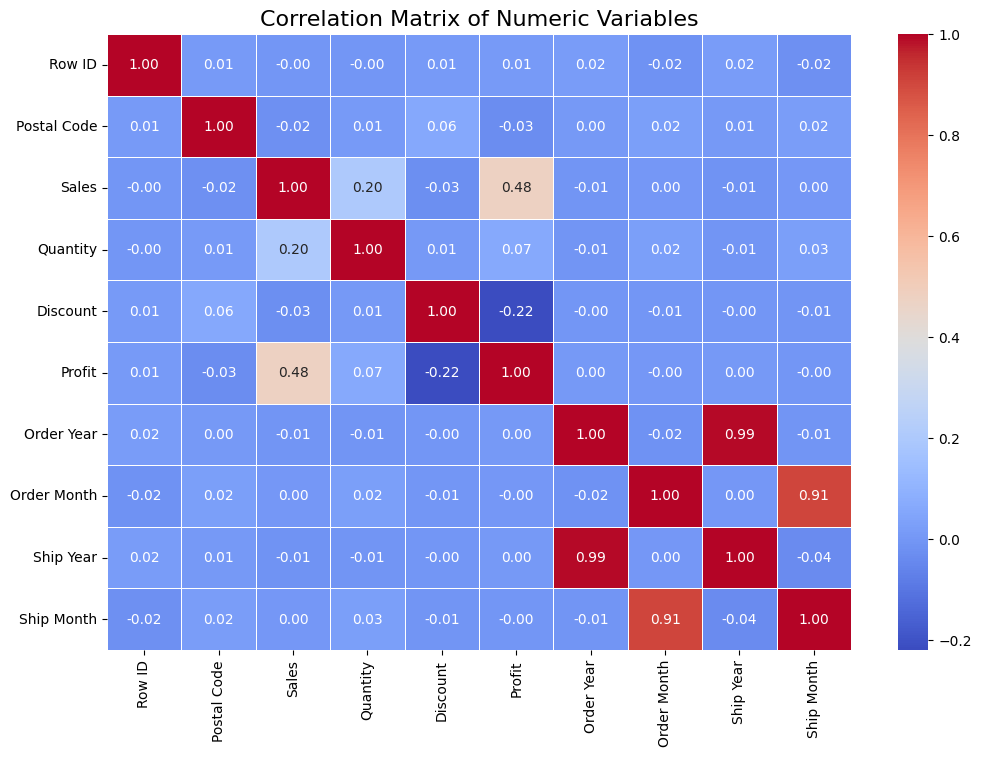

In [48]:
# Selecting only numeric columns for correlation matrix

numeric_columns = sales_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.show()

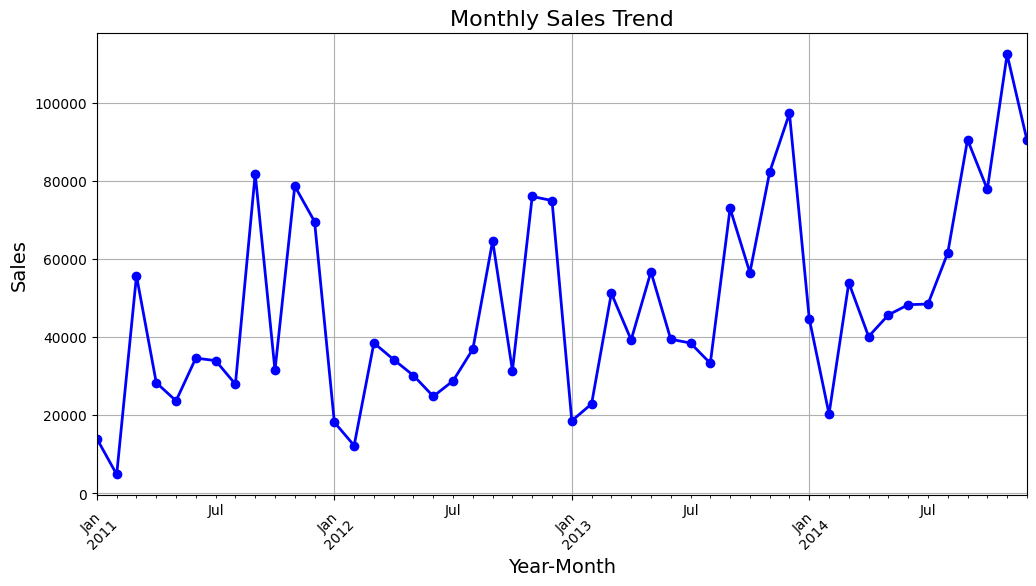

In [57]:
# Plotting sales trends over time
# Resample sales data by month

sales_trends = sales_data.groupby('Year-Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', color='blue', marker='o', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

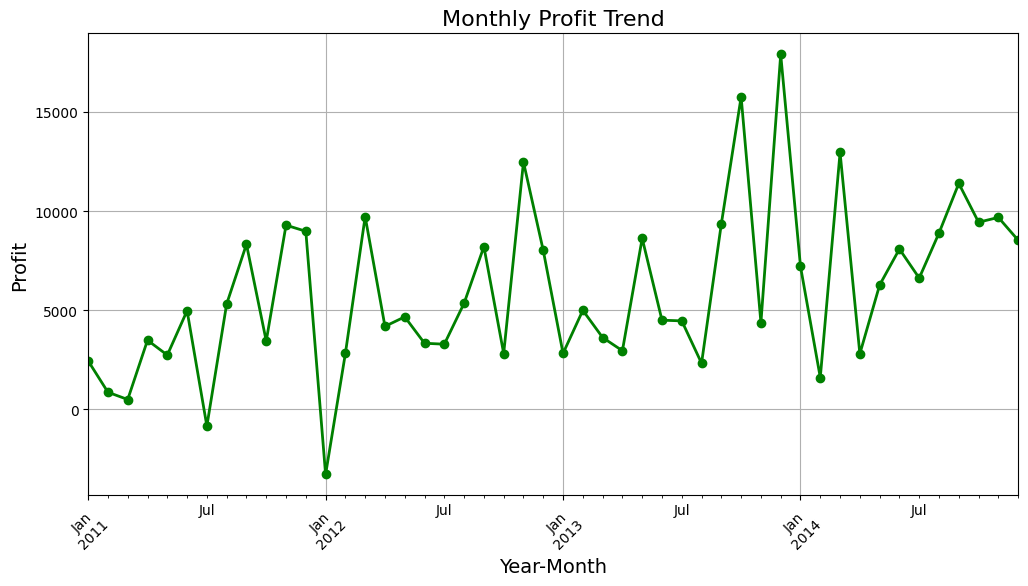

In [58]:
# Plotting profit trends over time

profit_trends = sales_data.groupby('Year-Month')['Profit'].sum()
plt.figure(figsize=(12, 6))
profit_trends.plot(kind='line', color='green', marker='o', linewidth=2)
plt.title('Monthly Profit Trend', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Top categories by total sales:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Top categories by total profit:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


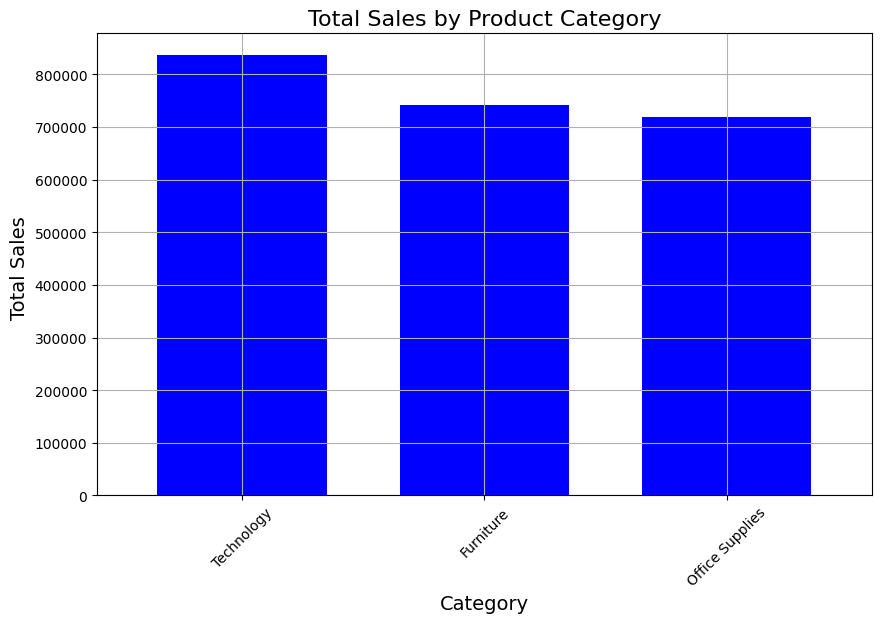

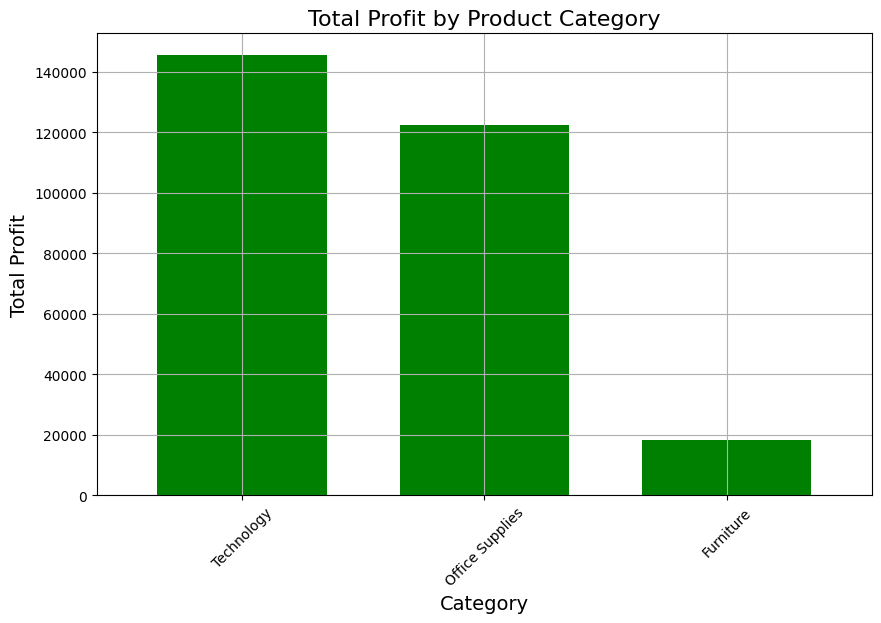

In [61]:
# Identifying top-performing product categories based on total sales and profit
category_sales = sales_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = sales_data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("Top categories by total sales:")
print(category_sales)
print("\nTop categories by total profit:")
print(category_profit)

# Plotting total sales by product category

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='blue', width=0.7)
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales ', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




# Plotting total profit by product category

plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar', color='green', width=0.7)
plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [62]:

# Generating summary statistics for each region

region_summary = sales_data.groupby('Region').agg({
    'Sales': ['mean', 'median', 'std', 'sum'],
    'Profit': ['mean', 'median', 'std', 'sum'],
    'Quantity': ['mean', 'median', 'std', 'sum']
})

# Display summary statistics

print(region_summary)

              Sales                                      Profit           \
               mean  median         std          sum       mean   median   
Region                                                                     
Central  215.772661  45.980  632.779010  501239.8908  17.092709   5.1840   
East     238.336110  54.900  620.712652  678781.2400  32.135808   8.1717   
South    241.803645  54.594  774.796273  391721.9050  28.857673   9.0720   
West     226.493233  60.840  524.876877  725457.8245  33.849032  11.1664   

                                  Quantity                          
                std          sum      mean median       std    sum  
Region                                                              
Central  291.487465   39706.3625  3.779595    3.0  2.160561   8780  
East     251.605084   91522.7800  3.728230    3.0  2.221779  10618  
South    212.893088   46749.4303  3.832716    3.0  2.249379   6209  
West     174.109081  108418.4489  3.829535    3.0  2.

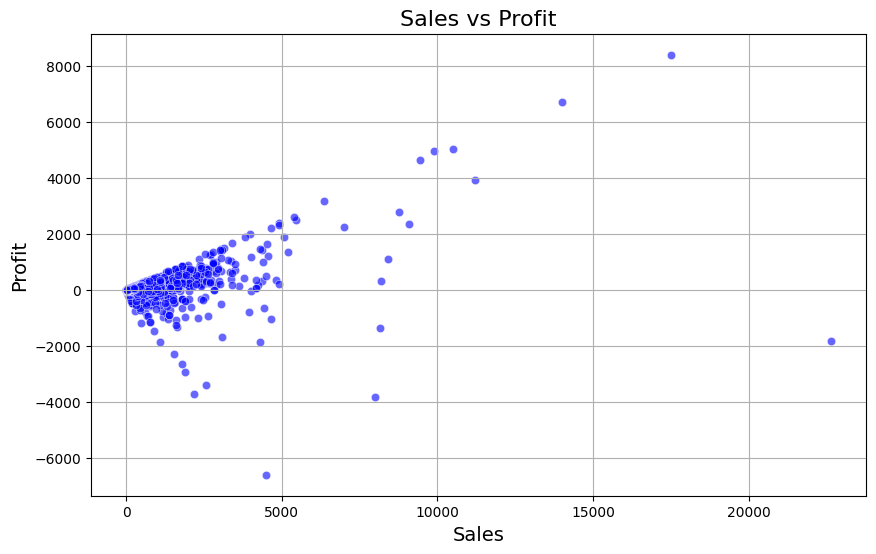

Correlation Coefficient between Sales and Profit: 0.4791


In [63]:
# Visualizing the correlation between sales and profit

correlation_coefficient = sales_data[['Sales', 'Profit']].corr().iloc[0, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='Sales', y='Profit', color='blue', alpha=0.6)
plt.title('Sales vs Profit', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()


# Displaying the correlation coefficient
print(f"Correlation Coefficient between Sales and Profit: {correlation_coefficient:.4f}")






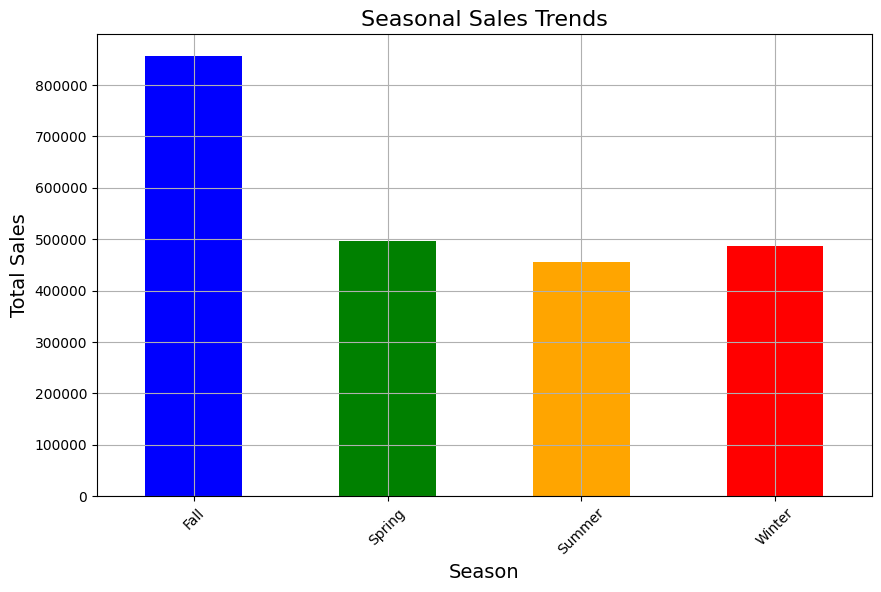

In [67]:


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

sales_data['Season'] = sales_data['Order Month'].apply(get_season)
seasonal_sales = sales_data.groupby('Season')['Sales'].sum()
plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Seasonal Sales Trends', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


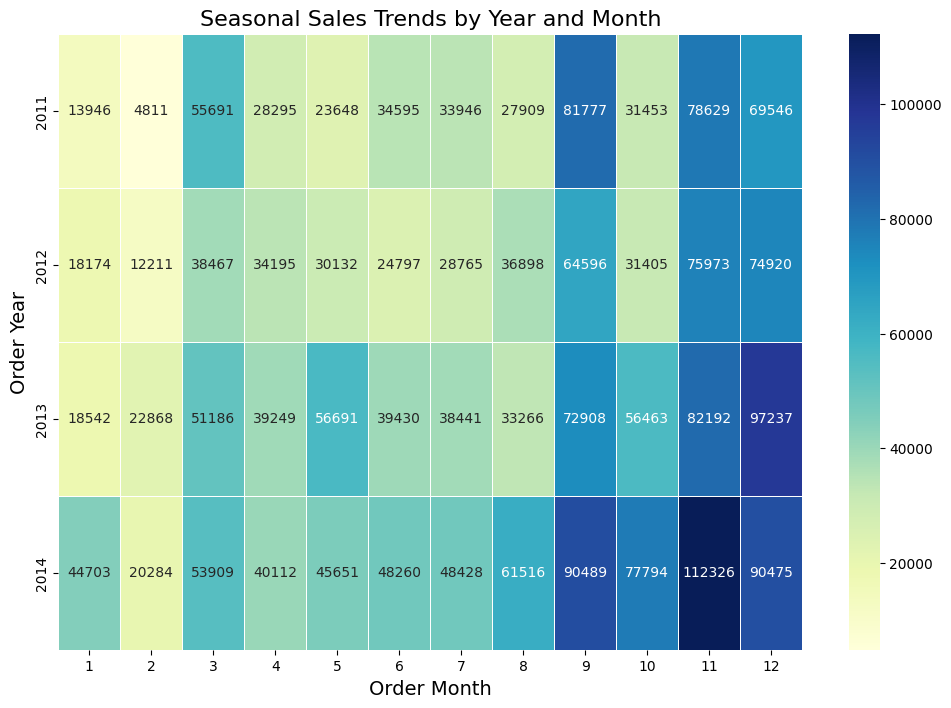

In [70]:
# Analyzing seasonal sales trends
# Grouping sales data by month and year
# Plotting seasonal sales trends

seasonal_sales = sales_data.groupby(['Order Year', 'Order Month'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_sales, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Seasonal Sales Trends by Year and Month', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Order Year', fontsize=14)
plt.show()

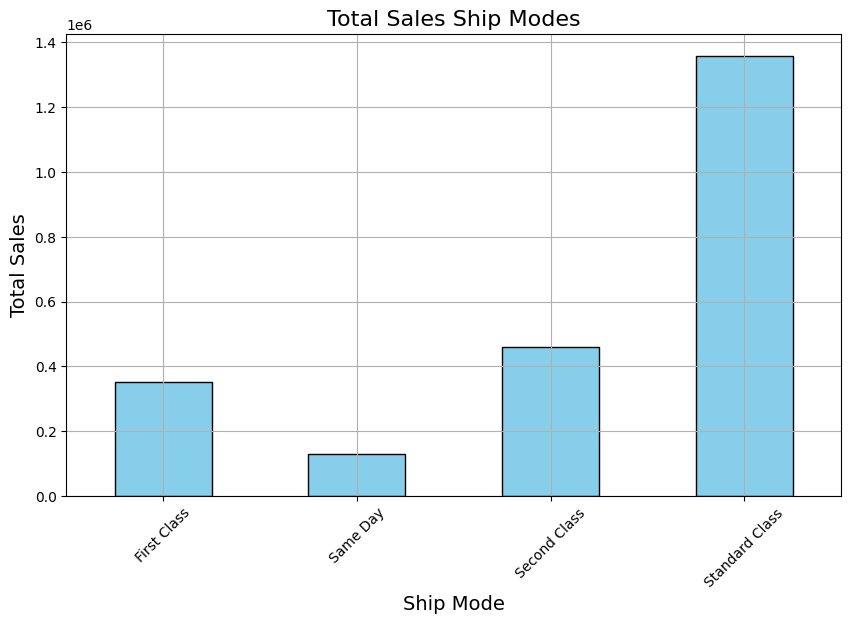


Ship Mode:
First Class: 351,428.42
Same Day: 128,363.12
Second Class: 459,193.57
Standard Class: 1,358,215.74


In [75]:
# Comparing sales across different ship modes

sales_by_ship_mode = sales_data.groupby('Ship Mode')['Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_ship_mode.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales Ship Modes', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("\nShip Modes:")
for ship_mode, total_sales in sales_by_ship_mode.items():
    print(f"{ship_mode}: {total_sales:,.2f}")


Column names after cleaning:
Index(['row_id', 'order_id', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'ship_year', 'ship_month', 'sales_binned', 'year-month', 'season',
       'year_month'],
      dtype='object')


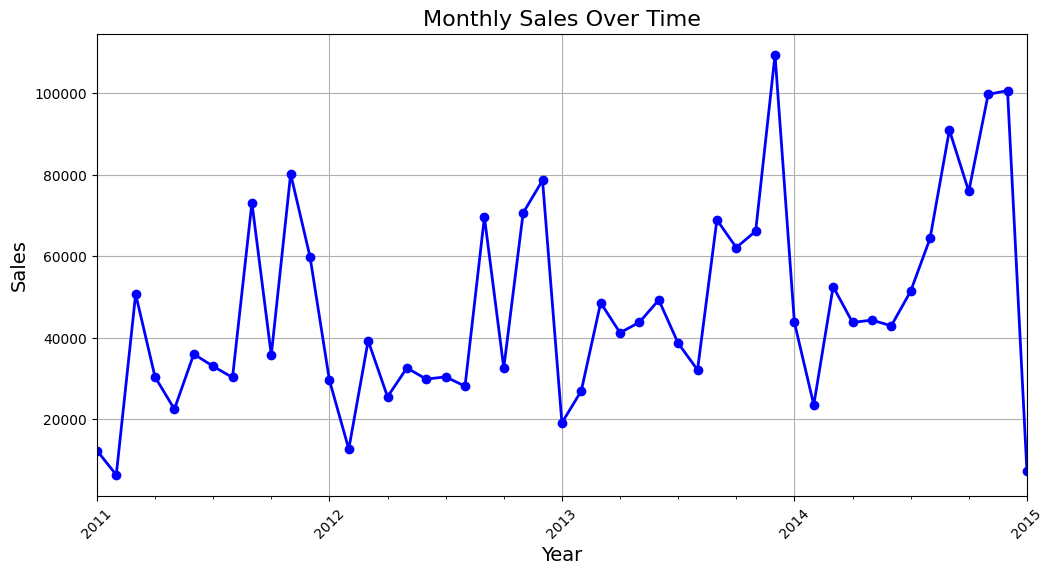

In [82]:
# Ensure column names are clean
sales_data.columns = sales_data.columns.str.strip().str.lower().str.replace(" ", "_")

# Print column names to verify
print("Column names after cleaning:")
print(sales_data.columns)

# Ensure 'Ship Date' column is datetime type
sales_data['ship_date'] = pd.to_datetime(sales_data['ship_date'], errors='coerce')

# Dropping rows where 'Ship Date' couldn't be converted
sales_data.dropna(subset=['ship_date'], inplace=True)

# Resample sales data by month

sales_data['year_month'] = sales_data['ship_date'].dt.to_period('M')
sales_by_month = sales_data.groupby('year_month')['sales'].sum()
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line', color='blue', marker='o', linewidth=2)
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()